# Importing Libraries

In [1]:
#!pip install -U scikit-learn
import dask.dataframe as dd
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Reading Data Files

In [2]:
enron_df_cleaned = pd.read_pickle('./Data/enron_df_cleaned.pkl')
enron_df_cleaned = dd.from_pandas(enron_df_cleaned, npartitions=200)

hillary_df_cleaned = pd.read_pickle('./Data/hillary_df_cleaned.pkl')
enron_df = pd.read_csv('./Data/enron_05_17_2015_with_labels_v2_100K_chunk_6_of_6.csv')
hillary_df = pd.read_csv('./Data/Emails.csv')

# EDA

## Raw data

In [3]:
enron_df.shape

(17401, 52)

In [4]:
enron_df.columns

Index(['Unnamed: 0', 'Message-ID', 'Date', 'From', 'To', 'Subject', 'X-From',
       'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName',
       'content', 'user', 'Cat_1_level_1', 'Cat_1_level_2', 'Cat_1_weight',
       'Cat_2_level_1', 'Cat_2_level_2', 'Cat_2_weight', 'Cat_3_level_1',
       'Cat_3_level_2', 'Cat_3_weight', 'Cat_4_level_1', 'Cat_4_level_2',
       'Cat_4_weight', 'Cat_5_level_1', 'Cat_5_level_2', 'Cat_5_weight',
       'Cat_6_level_1', 'Cat_6_level_2', 'Cat_6_weight', 'Cat_7_level_1',
       'Cat_7_level_2', 'Cat_7_weight', 'Cat_8_level_1', 'Cat_8_level_2',
       'Cat_8_weight', 'Cat_9_level_1', 'Cat_9_level_2', 'Cat_9_weight',
       'Cat_10_level_1', 'Cat_10_level_2', 'Cat_10_weight', 'Cat_11_level_1',
       'Cat_11_level_2', 'Cat_11_weight', 'Cat_12_level_1', 'Cat_12_level_2',
       'Cat_12_weight', 'labeled'],
      dtype='object')

In [5]:
enron_df = enron_df[['Subject', 'content']]
enron_df = enron_df.rename({'content': 'Content'}, axis=1)
enron_df.columns

Index(['Subject', 'Content'], dtype='object')

In [6]:
hillary_df.shape

(7945, 22)

In [7]:
hillary_df.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

In [8]:
hillary_df = hillary_df[['ExtractedSubject', 'ExtractedBodyText']]
hillary_df = hillary_df.rename({'ExtractedSubject': 'Subject', \
                                'ExtractedBodyText': 'Content'}, \
                               axis=1)
hillary_df.columns

Index(['Subject', 'Content'], dtype='object')

## Cleaned data

In [9]:
enron_df_cleaned.shape

(Delayed('int-532ccda4-ea27-4808-88dd-4256dfe4d246'), 2)

In [10]:
hillary_df_cleaned.shape

(5425, 2)

### Defining Function

In [11]:
def plot_ngram(df, column_name, min_n, max_n):
    cv = CountVectorizer(stop_words='english', ngram_range=(min_n, max_n))
    transformed = cv.fit_transform(df[column_name])
    transformed_df = pd.DataFrame(data=transformed.todense(), columns=cv.get_feature_names_out())
    transformed_df_sum = transformed_df.sum().\
                         sort_values(ascending=False).\
                         head(10).\
                         plot(kind='barh', \
                              title='Top 10 word(s) by Frequency', \
                              xlabel='Word(s)')
    plt.xlabel('Frequency')
    
    return transformed_df_sum

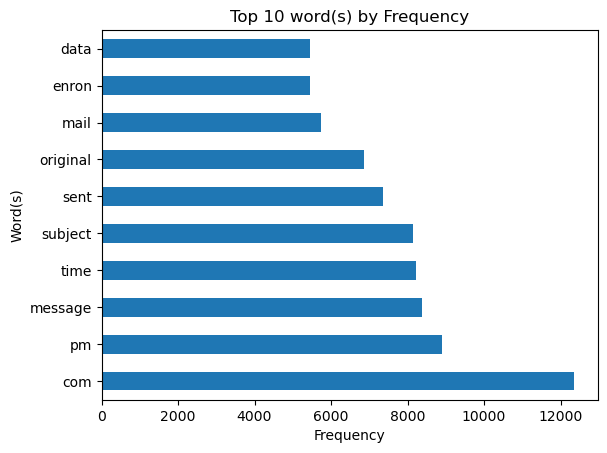

In [12]:
plot_ngram(enron_df_cleaned, 'Content', 1, 1);

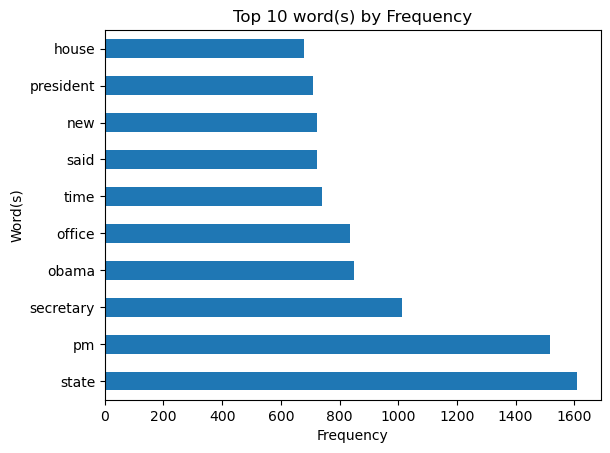

In [13]:
plot_ngram(hillary_df_cleaned, 'Content', 1, 1);

### Comments
<br>
1) Both Enron and Hillary's emails have a common word in them which is 'pm'. Therefore this is no cause for concern as it could be an e-mail slang used in the western sphere.
<br>
<br>
2) However the most commong word in enron's email is 'com' and must be investigated.

In [14]:
pd.set_option('display.max_colwidth', None)
enron_df_cleaned[enron_df_cleaned['Content'].str.contains(' com ')].head()

Subject  \
1                                                                           More UC/CSU   
13  State Senate OKs bailing out from bankruptcy Assembly plans own version for utility   
32                                                 Mariner Energy, Inc. - Press Release   
34                                                           Momentum of President Bush   
58                                                                  FW: Crisis in Japan   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [15]:
plot_ngram(enron_df_cleaned, 'Content', 2, 2);

MemoryError: Unable to allocate 66.4 GiB for an array with shape (17401, 512444) and data type int64

In [ ]:
plot_ngram(hillary_df_cleaned, 'Content', 2, 2);